<a href="https://colab.research.google.com/github/wuba2010work/CWP/blob/main/ETa20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install rasterio geopandas numpy
!pip install GDAL
import rasterio
import numpy as np
import os
from google.colab import drive
from rasterio.plot import show
import matplotlib.pyplot as plt
from osgeo import gdal

In [9]:
# Set paths
# Correct path to the DIRECTORY containing the TIFF files
input_dir = '/content/drive/MyDrive/ETa/'  # Note: ends with slash
os.listdir(input_dir)  # This should now work
output_dir = '/content/drive/MyDrive/ETa/5day_composites/'
os.makedirs(output_dir, exist_ok=True)

In [10]:
# List files in input directory
print("Contents of input directory:")
files = os.listdir(input_dir)
for file in files:
    print(file)

Contents of input directory:
.ipynb_checkpoints
5day_composites
Jan_ETa_2025_20m.tif


In [11]:
# visualizing tiff files only

print("TIFF files in input directory:")
for file in os.listdir(input_dir):
    if file.lower().endswith('.tif') or file.lower().endswith('.tiff'):
        print(file)

TIFF files in input directory:
Jan_ETa_2025_20m.tif


In [12]:
# checking files

print(os.path.isdir('/content/drive/MyDrive/ETa/'))  # Should be True
print(os.path.isfile('/content/drive/MyDrive/ETa/Jan_ETa_2025_20m.tif'))  # Should be True

True
True


In [14]:
tif_path = '/content/drive/MyDrive/ETa/Jan_ETa_2025_20m.tif'
ds = gdal.Open(tif_path)

In [27]:
# Open the raster
with rasterio.open(tif_path) as src:
    num_bands = src.count
    print(f"The file has {num_bands} bands.\n")

    # List and print each band
    for i in range(1, num_bands + 1):  # rasterio bands are 1-indexed
        print(f"Band {i} → Day {i} of January 2025")

The file has 31 bands.

Band 1 → Day 1 of January 2025
Band 2 → Day 2 of January 2025
Band 3 → Day 3 of January 2025
Band 4 → Day 4 of January 2025
Band 5 → Day 5 of January 2025
Band 6 → Day 6 of January 2025
Band 7 → Day 7 of January 2025
Band 8 → Day 8 of January 2025
Band 9 → Day 9 of January 2025
Band 10 → Day 10 of January 2025
Band 11 → Day 11 of January 2025
Band 12 → Day 12 of January 2025
Band 13 → Day 13 of January 2025
Band 14 → Day 14 of January 2025
Band 15 → Day 15 of January 2025
Band 16 → Day 16 of January 2025
Band 17 → Day 17 of January 2025
Band 18 → Day 18 of January 2025
Band 19 → Day 19 of January 2025
Band 20 → Day 20 of January 2025
Band 21 → Day 21 of January 2025
Band 22 → Day 22 of January 2025
Band 23 → Day 23 of January 2025
Band 24 → Day 24 of January 2025
Band 25 → Day 25 of January 2025
Band 26 → Day 26 of January 2025
Band 27 → Day 27 of January 2025
Band 28 → Day 28 of January 2025
Band 29 → Day 29 of January 2025
Band 30 → Day 30 of January 2025
Band

In [28]:
# Open the file and inspect bands
with rasterio.open(tif_path) as src:
    print(f"Number of bands: {src.count}")  # Should print 33 if your file has 33 bands
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"CRS (Coordinate Reference System): {src.crs}")
    print(f"Transform (geospatial info): {src.transform}")

    # Optional: Print metadata for each band
    for band_idx in range(1, src.count + 1):
        band = src.read(band_idx)
        print(f"\nBand {band_idx}:")
        print(f"  Shape: {band.shape}")
        print(f"  Min value: {band.min()}")
        print(f"  Max value: {band.max()}")
        print(f"  Data type: {band.dtype}")

Number of bands: 31
Width: 861, Height: 1278
CRS (Coordinate Reference System): None
Transform (geospatial info): | 0.00, 0.00, 40.10|
| 0.00,-0.00, 9.46|
| 0.00, 0.00, 1.00|

Band 1:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 8.09100341796875
  Data type: float32

Band 2:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 8.15928840637207
  Data type: float32

Band 3:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 8.505695343017578
  Data type: float32

Band 4:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 8.75728988647461
  Data type: float32

Band 5:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 8.46567153930664
  Data type: float32

Band 6:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 8.113889694213867
  Data type: float32

Band 7:
  Shape: (1278, 861)
  Min value: -3.4028230607370965e+38
  Max value: 8.345962524414062
  Data type: floa

In [29]:
# assign cordinate system
output_path = '/content/drive/MyDrive/ETa/ETa_with_crs.tif'

with rasterio.open(tif_path) as src:
    profile = src.profile
    profile.update(crs='EPSG:4326')  # Assign WGS84

    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(src.read())  # Copy all bands
print(f"File saved with CRS at: {output_path}")

File saved with CRS at: /content/drive/MyDrive/ETa/ETa_with_crs.tif


In [30]:
#checking the coordinate system

with rasterio.open(output_path) as src:
    print("Updated CRS:", src.crs)  # Should now show the assigned CRS
    print("Transform:", src.transform)  # Unchanged

Updated CRS: EPSG:4326
Transform: | 0.00, 0.00, 40.10|
| 0.00,-0.00, 9.46|
| 0.00, 0.00, 1.00|


In [31]:
# checking for 'no value' data

with rasterio.open(tif_path) as src:
    # Read all bands (33 days)
    data = src.read()  # Shape: (33, 1278, 861)

    # Mask NoData values (-3.4e+38)
    masked_data = np.ma.masked_equal(data, -3.4028230607370965e+38)

    # Count valid pixels per band
    valid_pixels_per_band = np.sum(~masked_data.mask, axis=(1, 2))

    # Print results
    for band_idx in range(src.count):
        print(f"Band {band_idx + 1}:")
        print(f"  Valid pixels: {valid_pixels_per_band[band_idx]}")
        print(f"  % Valid data: {100 * valid_pixels_per_band[band_idx] / (src.height * src.width):.2f}%")

    # Total statistics
    print("\nSummary:")
    print(f"Total pixels per band: {src.height * src.width}")
    print(f"Mean % valid data across all bands: {np.mean(valid_pixels_per_band) / (src.height * src.width) * 100:.2f}%")


Band 1:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 2:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 3:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 4:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 5:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 6:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 7:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 8:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 9:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 10:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 11:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 12:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 13:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 14:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 15:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 16:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 17:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 18:
  Valid pixels: 378608
  % Valid data: 34.41%
Band 19:
  Valid pi

In [34]:
# masked no data value of all days


# Open file and mask NoData (-3.4e+38)
with rasterio.open(tif_path) as src:
    data = src.read()  # Shape: (33, 1278, 861)
    masked_data = np.ma.masked_equal(data, -3.4028230607370965e+38)

    # Verify masking worked
    print(f"Masked values count: {np.sum(masked_data.mask)}")
    print(f"Sample masked values: {masked_data[0, 0, 0]}")  # Check first pixel

Masked values count: 22374250
Sample masked values: --


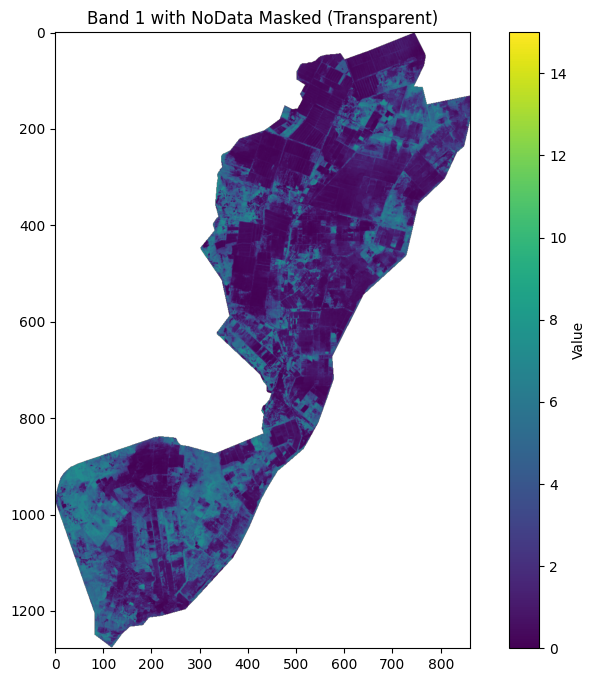

In [37]:
# visualize the masked data
import matplotlib.pyplot as plt

# Plot Band 1 with NoData as transparent
plt.figure(figsize=(10, 8))
plt.imshow(masked_data[0], cmap='viridis', vmin=0, vmax=15)
plt.colorbar(label='Value')
plt.title("Band 1 with NoData Masked (Transparent)")
plt.show()

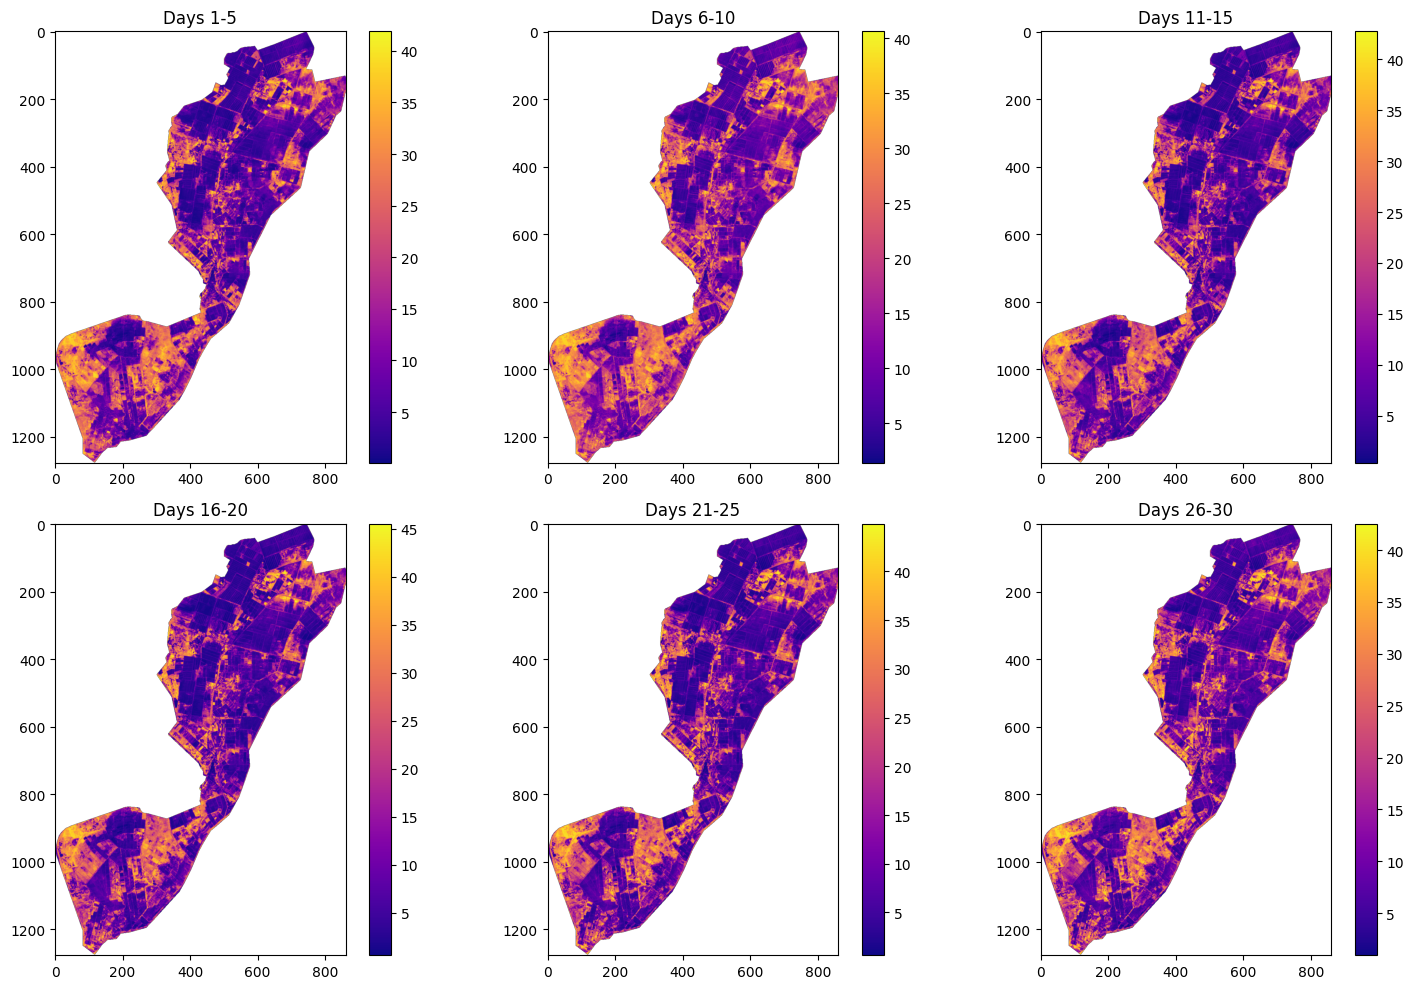

In [38]:
# 5 day temporal resolution with masked data

# Calculate 5-day sums (automatically ignores NoData)
n_composites = 6
sums = np.ma.zeros((n_composites, *masked_data.shape[1:]))

for i in range(n_composites):
    start = i * 5
    end = start + 5
    sums[i] = np.ma.sum(masked_data[start:end], axis=0)

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < n_composites:
        im = ax.imshow(sums[i], cmap='plasma')
        plt.colorbar(im, ax=ax)
        ax.set_title(f'Days {i*5+1}-{i*5+5}')
plt.tight_layout()

Period 1 (Days 1-10):
  Min: 1.75
  Max: 81.83
  Mean: 29.84

Period 2 (Days 11-20):
  Min: 1.00
  Max: 88.27
  Mean: 26.17

Period 3 (Days 21-31):
  Min: 1.76
  Max: 96.61
  Mean: 30.20



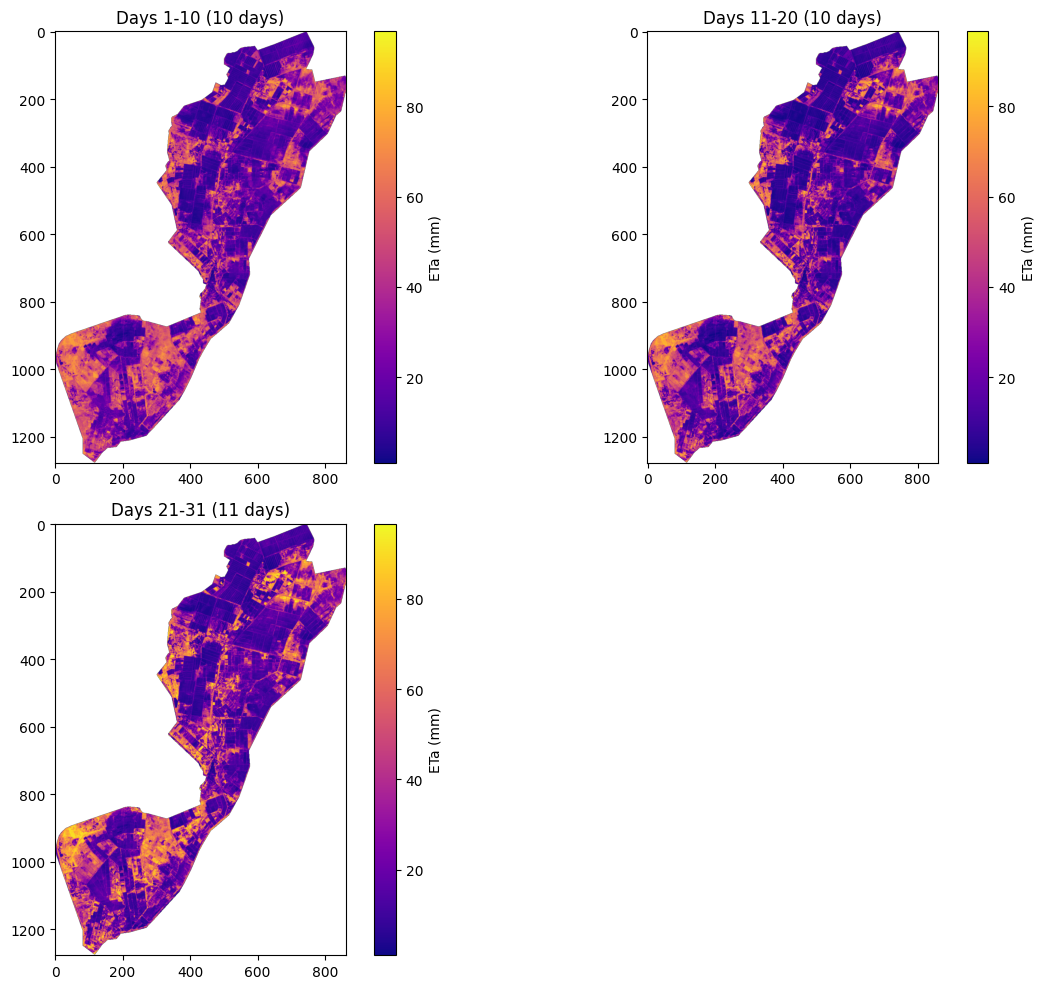

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming masked_data has shape (31, height, width) for 31 days
n_days = masked_data.shape[0]

# Calculate composites:
# - Three 10-day periods (days 1-10, 11-20, 21-30)
# - One 6-day period (days 26-31)
composite_periods = [
    (0, 10),   # days 1-10
    (10, 20),  # days 11-20
    (20, 31),  # days 21-31

]

n_composites = len(composite_periods)
sums = np.ma.zeros((n_composites, *masked_data.shape[1:]))

# Calculate sums for each period
for i, (start, end) in enumerate(composite_periods):
    sums[i] = np.ma.sum(masked_data[start:end], axis=0)

    # Print stats
    print(f"Period {i+1} (Days {start+1}-{end}):")
    print(f"  Min: {sums[i].min():.2f}")
    print(f"  Max: {sums[i].max():.2f}")
    print(f"  Mean: {sums[i].mean():.2f}\n")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten for easy iteration

for i, ax in enumerate(axes):
    if i < n_composites:
        start, end = composite_periods[i]
        im = ax.imshow(sums[i], cmap='plasma',
                      vmin=np.ma.min(sums),
                      vmax=np.ma.max(sums))
        plt.colorbar(im, ax=ax, label='ETa (mm)')
        ax.set_title(f'Days {start+1}-{end} ({end-start} days)')
    else:
        ax.axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

Period 1 (Days 1-15, 15 days):
  Min: 2.10
  Max: 124.35
  Mean: 42.68

Period 2 (Days 16-31, 16 days):
  Min: 2.53
  Max: 142.13
  Mean: 43.54



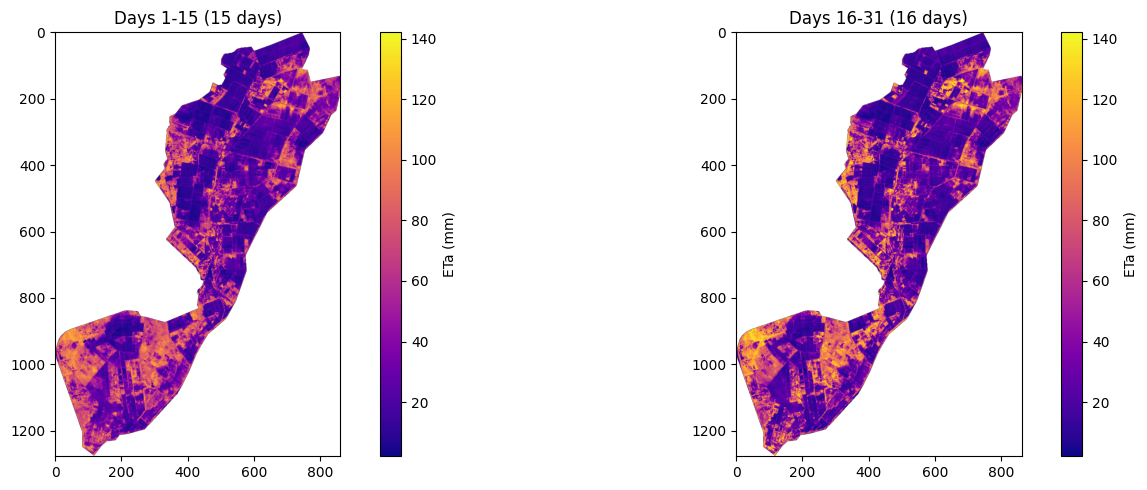

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming masked_data has shape (31, height, width) for 31 days
n_days = masked_data.shape[0]

# Define custom periods - two 15-day periods would leave day 31 alone,
# so we'll make one 15-day period and one 16-day period
composite_periods = [
    (0, 15),   # days 1-15 (15 days)
    (15, 31)   # days 16-31 (16 days)
]

n_composites = len(composite_periods)
sums = np.ma.zeros((n_composites, *masked_data.shape[1:]))

# Calculate sums for each period
for i, (start, end) in enumerate(composite_periods):
    sums[i] = np.ma.sum(masked_data[start:end], axis=0)

    # Print stats
    duration = end - start
    print(f"Period {i+1} (Days {start+1}-{end}, {duration} days):")
    print(f"  Min: {sums[i].min():.2f}")
    print(f"  Max: {sums[i].max():.2f}")
    print(f"  Mean: {sums[i].mean():.2f}\n")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

for i, ax in enumerate(axes.flat):
    start, end = composite_periods[i]
    duration = end - start
    im = ax.imshow(sums[i], cmap='plasma',
                  vmin=np.ma.min(sums),
                  vmax=np.ma.max(sums))
    plt.colorbar(im, ax=ax, label='ETa (mm)')
    ax.set_title(f'Days {start+1}-{end} ({duration} days)')

plt.tight_layout()
plt.show()

January (Days 1-31) Statistics:
Min: 5.79 mm
Max: 265.19 mm
Mean: 86.22 mm
Total: 32642842.00 mm


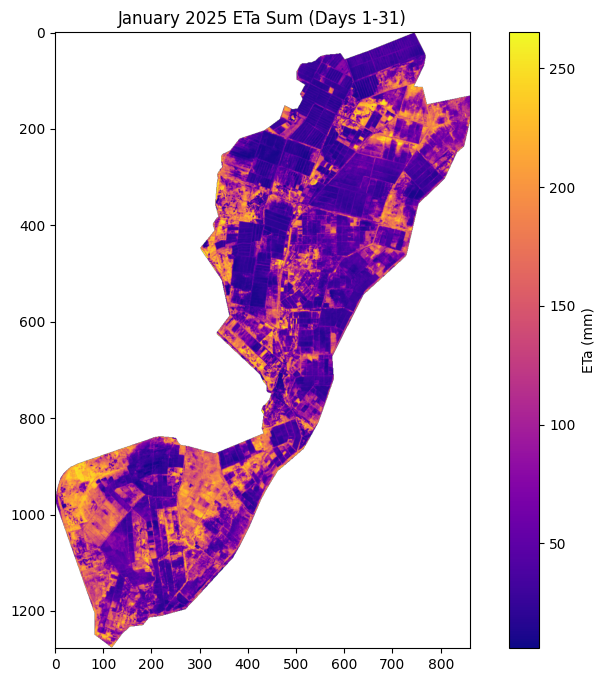

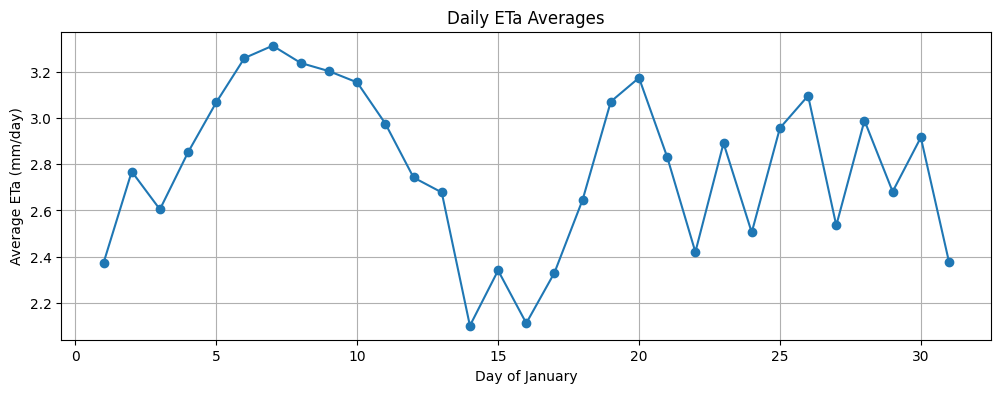

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming masked_data has shape (31, height, width) for January
january_data = masked_data  # Days 1-31

# Calculate monthly sum for January
january_sum = np.ma.sum(january_data, axis=0)

# Calculate statistics
stats = {
    'Min': january_sum.min(),
    'Max': january_sum.max(),
    'Mean': january_sum.mean(),
    'Total': january_sum.sum()
}

# Print statistics
print("January (Days 1-31) Statistics:")
for key, value in stats.items():
    print(f"{key}: {value:.2f} mm")

# Visualization
plt.figure(figsize=(10, 8))
im = plt.imshow(january_sum, cmap='plasma')
plt.colorbar(im, label='ETa (mm)')
plt.title('January 2025 ETa Sum (Days 1-31)')
plt.show()

# Additional: Daily averages visualization
daily_avg = np.ma.mean(january_data, axis=(1, 2))
plt.figure(figsize=(12, 4))
plt.plot(range(1, 32), daily_avg, 'o-')
plt.xlabel('Day of January')
plt.ylabel('Average ETa (mm/day)')
plt.title('Daily ETa Averages')
plt.grid(True)
plt.show()

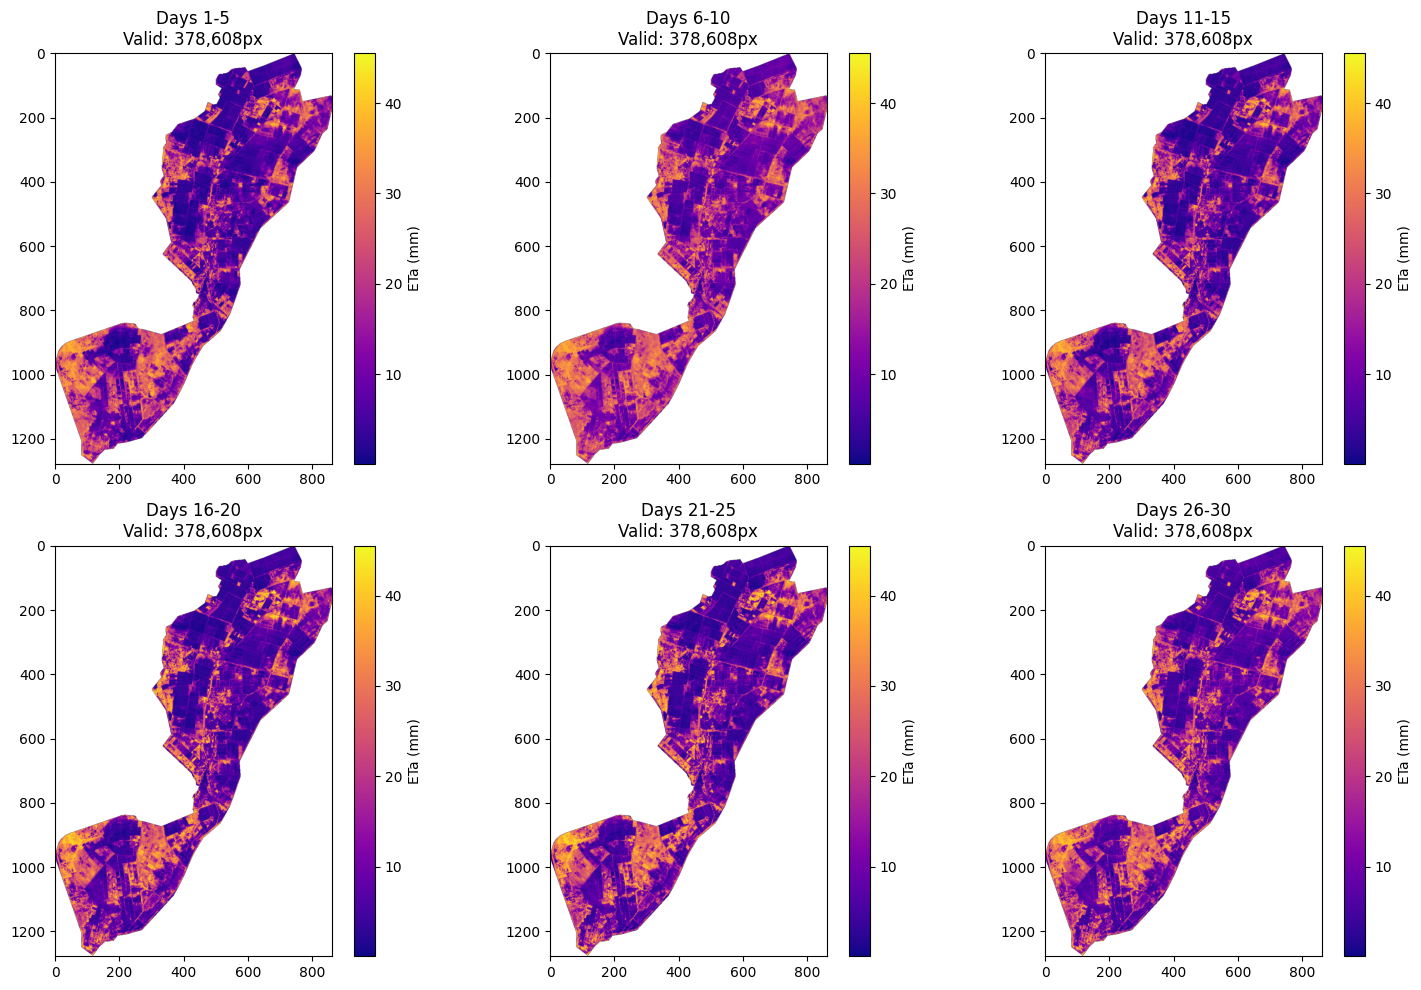

Successfully saved all outputs to: /content/5day_composites


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio.transform import from_origin
import pandas as pd

# Create output directory
output_dir = '/content/5day_composites'
os.makedirs(output_dir, exist_ok=True)

# Calculate 5-day sums - result is masked array
n_composites = 6
sums = np.ma.zeros((n_composites, *masked_data.shape[1:]))

for i in range(n_composites):
    start = i * 5
    end = start + 5
    sums[i] = np.ma.sum(masked_data[start:end], axis=0)

# Georeferencing setup (EPSG:4326)
crs = rasterio.crs.CRS.from_epsg(4326)  # Proper CRS object
transform = from_origin(0, 50, 0.00027778, 0.00027778)  # Adjust to your data

# Save each composite as GeoTIFF (handles masked data properly)
for i in range(n_composites):
    output_path = os.path.join(output_dir, f'eta_5day_{i+1}_days_{i*5+1}-{i*5+5}.tif')
    with rasterio.open(
        output_path,
        'w',
        driver='GTiff',
        height=sums.shape[1],
        width=sums.shape[2],
        count=1,
        dtype=sums.dtype,
        crs=crs,
        transform=transform,
        nodata=np.nan
    ) as dst:
        # Convert masked array to regular array with NaN for missing values
        dst.write(np.ma.filled(sums[i], np.nan), 1)

# Save all composites - convert masked array to regular array first
sums_filled = np.ma.filled(sums, np.nan)  # Convert to regular array with NaN
np.save(os.path.join(output_dir, 'all_5day_composites.npy'), sums_filled)

# Save statistics (works with masked arrays)
stats = []
for i in range(n_composites):
    stats.append({
        'Period': f'Days {i*5+1}-{i*5+5}',
        'Min': f"{sums[i].min():.2f}",
        'Max': f"{sums[i].max():.2f}",
        'Mean': f"{sums[i].mean():.2f}",
        'Valid_Pixels': f"{sums[i].count():,}"  # Counts non-masked values
    })
pd.DataFrame(stats).to_csv(os.path.join(output_dir, 'composites_stats.csv'), index=False)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
vmin = np.ma.min(sums)
vmax = np.ma.max(sums)
for i, ax in enumerate(axes.flat):
    if i < n_composites:
        im = ax.imshow(sums[i], cmap='plasma', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=ax, label='ETa (mm)')
        ax.set_title(f'Days {i*5+1}-{i*5+5}\nValid: {sums[i].count():,}px')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'composites_map.png'), dpi=300, bbox_inches='tight')
plt.show()

print("Successfully saved all outputs to:", output_dir)

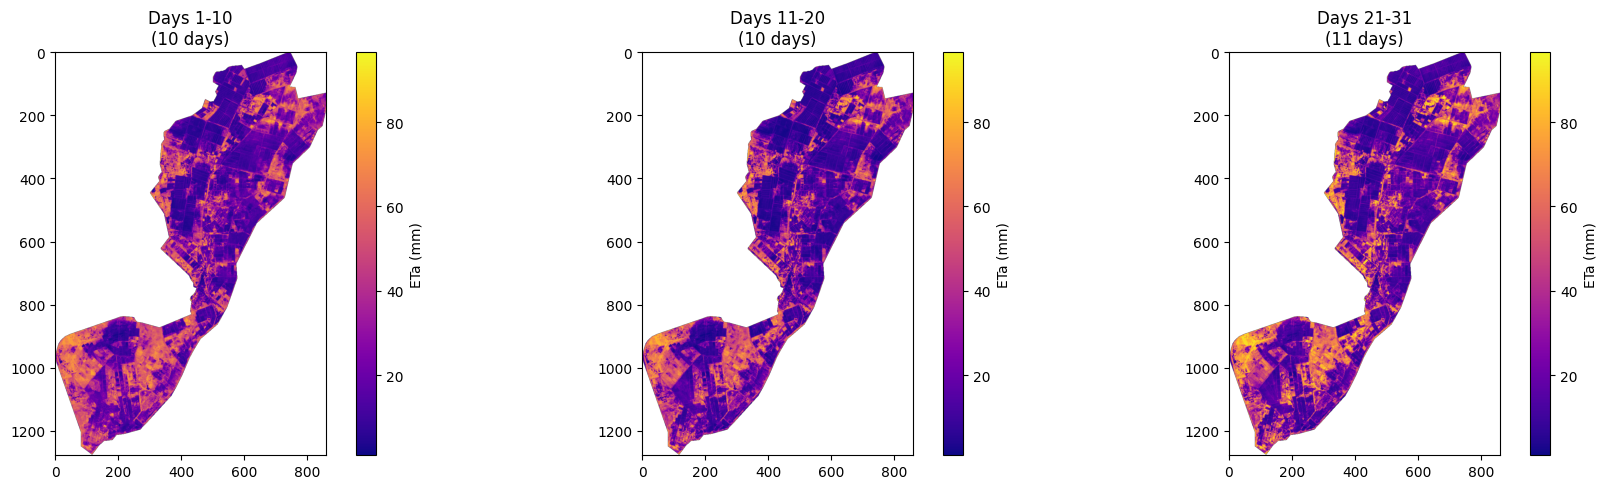

Successfully saved 3 composites to /content/10day_composites_with31
Files created: ['composites_visualization.png', 'eta_10day_1-10.tif', 'eta_10day_11-20.tif', 'composite_stats.csv', 'eta_11day_21-31.tif', 'all_composites.npy']


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio.transform import from_origin
import pandas as pd

# Configuration
output_dir = '/content/10day_composites_with31'
os.makedirs(output_dir, exist_ok=True)
crs = rasterio.crs.CRS.from_epsg(4326)  # WGS84
transform = from_origin(0, 50, 0.00027778, 0.00027778)  # Adjust to your data

# Define composite periods (10-day + final 11-day)
periods = [
    (0, 10),   # Days 1-10
    (10, 20),  # Days 11-20
    (20, 31)   # Days 21-31 (11 days)
]
n_composites = len(periods)

# Calculate composites
composites = np.ma.zeros((n_composites, *masked_data.shape[1:]))
for i, (start, end) in enumerate(periods):
    composites[i] = np.ma.sum(masked_data[start:end], axis=0)

# Save each composite as GeoTIFF
for i, (start, end) in enumerate(periods):
    duration = end - start
    output_path = os.path.join(output_dir, f'eta_{duration}day_{start+1}-{end}.tif')

    with rasterio.open(
        output_path,
        'w',
        driver='GTiff',
        height=composites.shape[1],
        width=composites.shape[2],
        count=1,
        dtype=str(composites.dtype),
        crs=crs,
        transform=transform,
        nodata=np.nan
    ) as dst:
        dst.write(np.ma.filled(composites[i], np.nan), 1)

# Save all composites as numpy array
np.save(os.path.join(output_dir, 'all_composites.npy'), np.ma.filled(composites, np.nan))

# Save statistics
stats = []
for i, (start, end) in enumerate(periods):
    stats.append({
        'Period': f'Days {start+1}-{end}',
        'Duration': end-start,
        'Min': f"{composites[i].min():.2f}",
        'Max': f"{composites[i].max():.2f}",
        'Mean': f"{composites[i].mean():.2f}",
        'Valid_Pixels': composites[i].count()
    })
pd.DataFrame(stats).to_csv(os.path.join(output_dir, 'composite_stats.csv'), index=False)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
vmin, vmax = np.ma.min(composites), np.ma.max(composites)

for i, ax in enumerate(axes.flat):
    if i < n_composites:
        start, end = periods[i]
        im = ax.imshow(composites[i], cmap='plasma', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=ax, label='ETa (mm)')
        ax.set_title(f'Days {start+1}-{end}\n({end-start} days)')
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'composites_visualization.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"Successfully saved {n_composites} composites to {output_dir}")
print("Files created:", os.listdir(output_dir))

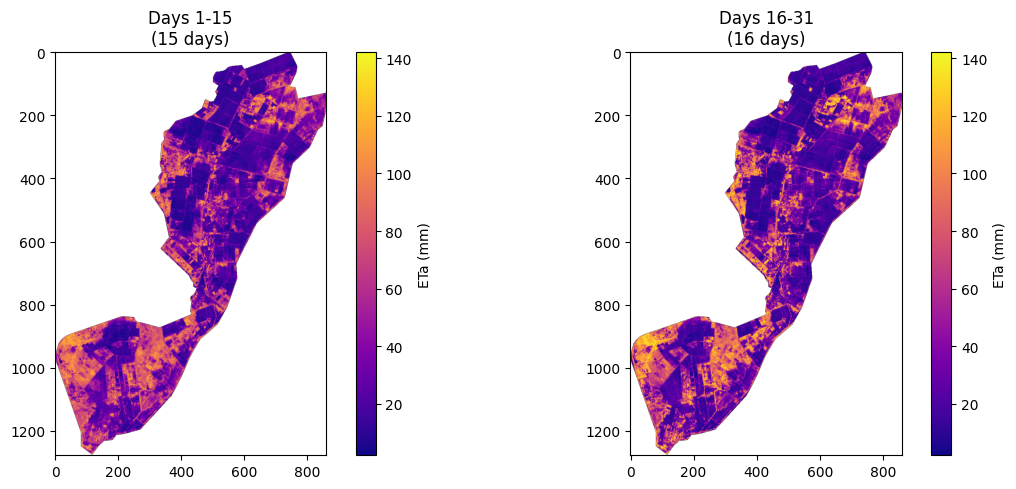

Successfully saved 2 composites to /content/15day_composites_with31
Files created: ['composites_visualization.png', 'eta_16day_16-31.tif', 'composite_stats.csv', 'all_composites.npy', 'eta_15day_1-15.tif']


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio.transform import from_origin
import pandas as pd

# Configuration
output_dir = '/content/15day_composites_with31'
os.makedirs(output_dir, exist_ok=True)
crs = rasterio.crs.CRS.from_epsg(4326)  # WGS84
transform = from_origin(0, 50, 0.00027778, 0.00027778)  # Adjust to your data

# Define composite periods (15-day + 16-day)
periods = [
    (0, 15),   # Days 1-15
    (15, 31)   # Days 16-31 (16 days)
]
n_composites = len(periods)

# Calculate composites
composites = np.ma.zeros((n_composites, *masked_data.shape[1:]))
for i, (start, end) in enumerate(periods):
    composites[i] = np.ma.sum(masked_data[start:end], axis=0)

# Save each composite as GeoTIFF
for i, (start, end) in enumerate(periods):
    duration = end - start
    output_path = os.path.join(output_dir, f'eta_{duration}day_{start+1}-{end}.tif')

    with rasterio.open(
        output_path,
        'w',
        driver='GTiff',
        height=composites.shape[1],
        width=composites.shape[2],
        count=1,
        dtype=str(composites.dtype),
        crs=crs,
        transform=transform,
        nodata=np.nan
    ) as dst:
        dst.write(np.ma.filled(composites[i], np.nan), 1)

# Save all composites as numpy array
np.save(os.path.join(output_dir, 'all_composites.npy'), np.ma.filled(composites, np.nan))

# Save statistics
stats = []
for i, (start, end) in enumerate(periods):
    stats.append({
        'Period': f'Days {start+1}-{end}',
        'Duration': end-start,
        'Min': f"{composites[i].min():.2f}",
        'Max': f"{composites[i].max():.2f}",
        'Mean': f"{composites[i].mean():.2f}",
        'Valid_Pixels': composites[i].count()
    })
pd.DataFrame(stats).to_csv(os.path.join(output_dir, 'composite_stats.csv'), index=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
vmin, vmax = np.ma.min(composites), np.ma.max(composites)

for i, ax in enumerate(axes.flat):
    if i < n_composites:
        start, end = periods[i]
        im = ax.imshow(composites[i], cmap='plasma', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=ax, label='ETa (mm)')
        ax.set_title(f'Days {start+1}-{end}\n({end-start} days)')
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'composites_visualization.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"Successfully saved {n_composites} composites to {output_dir}")
print("Files created:", os.listdir(output_dir))

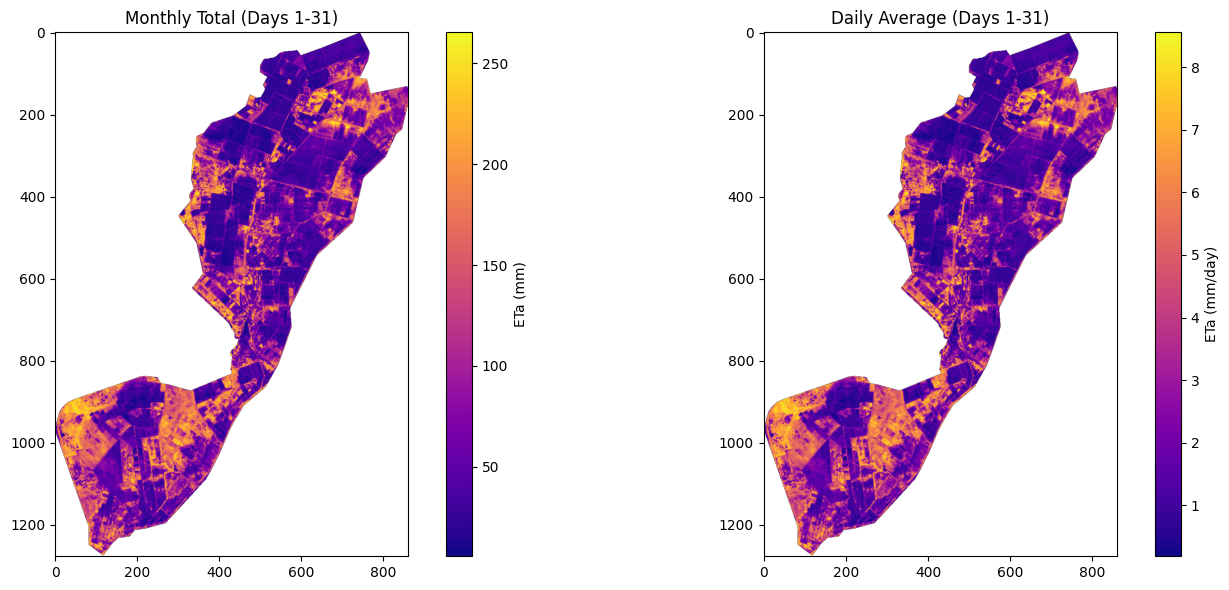

Monthly composite saved to /content/monthly_composite
Files created: monthly_sum.npy
monthly_composite.png
monthly_stats.csv
eta_monthly_sum.tif
monthly_avg.npy
eta_monthly_avg.tif


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio.transform import from_origin
import pandas as pd

# Configuration
output_dir = '/content/monthly_composite'
os.makedirs(output_dir, exist_ok=True)
crs = rasterio.crs.CRS.from_epsg(4326)  # WGS84
transform = from_origin(0, 50, 0.00027778, 0.00027778)  # Adjust to your data

# Calculate monthly composite (Days 1-31)
monthly_sum = np.ma.sum(masked_data, axis=0)  # Sum all 31 days
monthly_avg = np.ma.mean(masked_data, axis=0)  # Alternative: monthly average

# Save as GeoTIFF
with rasterio.open(
    os.path.join(output_dir, 'eta_monthly_sum.tif'),
    'w',
    driver='GTiff',
    height=monthly_sum.shape[0],
    width=monthly_sum.shape[1],
    count=1,
    dtype=str(monthly_sum.dtype),
    crs=crs,
    transform=transform,
    nodata=np.nan
) as dst:
    dst.write(np.ma.filled(monthly_sum, np.nan), 1)

# Save monthly average as separate GeoTIFF
with rasterio.open(
    os.path.join(output_dir, 'eta_monthly_avg.tif'),
    'w',
    driver='GTiff',
    height=monthly_avg.shape[0],
    width=monthly_avg.shape[1],
    count=1,
    dtype=str(monthly_avg.dtype),
    crs=crs,
    transform=transform,
    nodata=np.nan
) as dst:
    dst.write(np.ma.filled(monthly_avg, np.nan), 1)

# Save statistics
stats = {
    'Sum_Min': monthly_sum.min(),
    'Sum_Max': monthly_sum.max(),
    'Sum_Mean': monthly_sum.mean(),
    'Avg_Min': monthly_avg.min(),
    'Avg_Max': monthly_avg.max(),
    'Avg_Mean': monthly_avg.mean(),
    'Valid_Pixels': monthly_sum.count()
}

pd.DataFrame.from_dict(stats, orient='index', columns=['Value']).to_csv(
    os.path.join(output_dir, 'monthly_stats.csv'))

# Save numpy arrays
np.save(os.path.join(output_dir, 'monthly_sum.npy'), np.ma.filled(monthly_sum, np.nan))
np.save(os.path.join(output_dir, 'monthly_avg.npy'), np.ma.filled(monthly_avg, np.nan))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Monthly Sum Plot
im1 = ax1.imshow(monthly_sum, cmap='plasma')
plt.colorbar(im1, ax=ax1, label='ETa (mm)')
ax1.set_title('Monthly Total (Days 1-31)')

# Monthly Average Plot
im2 = ax2.imshow(monthly_avg, cmap='plasma')
plt.colorbar(im2, ax=ax2, label='ETa (mm/day)')
ax2.set_title('Daily Average (Days 1-31)')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'monthly_composite.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"Monthly composite saved to {output_dir}")
print("Files created:", '\n'.join(os.listdir(output_dir)))

In [57]:
# First install required packages
!pip install -q localtileserver folium leafmap rasterio matplotlib

import leafmap.foliumap as leafmap
import folium
from branca.colormap import LinearColormap
import numpy as np
import rasterio
import os

# Create output directory for interactive maps
map_dir = '/content/interactive_maps'
os.makedirs(map_dir, exist_ok=True)

def create_interactive_map(tif_path, title, output_html):
    """Create an interactive map from a GeoTIFF file"""
    try:
        # Create map centered on data
        m = leafmap.Map(
            tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
            attr='© OpenStreetMap contributors',
            zoom=13,
            height='600px'
        )

        # Add the raster with auto-scaling
        m.add_raster(
            tif_path,
            band=1,
            palette='plasma',
            layer_name=title,
            nodata=np.nan
        )

        # Add controls
        m.add_layer_control()
        m.add_colorbar(
            colors=['blue','cyan','lime','yellow','red'],
            caption='ETa (mm)'
        )

        # Save to HTML
        m.to_html(output_html)
        return m

    except Exception as e:
        print(f"Error creating map for {title}: {str(e)}")
        return None

# Define all your composite files
composites = {
    '5-day': '/content/5day_composites/eta_5day_1_days_1-5.tif',
    '10-day': '/content/10day_composites_with31/eta_10day_1-10.tif',
    '15-day': '/content/15day_composites_with31/eta_15day_1-15.tif',
    'Monthly': '/content/monthly_composite/eta_monthly_sum.tif'
}

# Create individual maps
for name, path in composites.items():
    print(f"Creating {name} map...")
    output_html = os.path.join(map_dir, f"{name.replace('-','_')}_map.html")
    m = create_interactive_map(path, f"{name} ETa Composite", output_html)
    if m:
        display(m)
        print(f"Saved to {output_html}\n")

# Create combined map with all layers
print("Creating combined map with all periods...")
combined_map = leafmap.Map(
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    attr='© OpenStreetMap contributors',
    zoom=10,
    height='600px'
)

# Add all layers
for name, path in composites.items():
    combined_map.add_raster(
        path,
        band=1,
        palette='plasma',
        layer_name=name,
        nodata=np.nan
    )

# Add controls and colorbar
combined_map.add_layer_control()
combined_map.add_colorbar(
    colors=['blue','cyan','lime','yellow','red'],
    caption='ETa (mm)'
)

# Save and display combined map
combined_html = os.path.join(map_dir, 'all_periods_map.html')
combined_map.to_html(combined_html)
display(combined_map)
print(f"Combined map saved to {combined_html}")

# Verify all outputs
print("\nGenerated interactive maps:")
for f in sorted(os.listdir(map_dir)):
    print(f"- {f}")

Creating 5-day map...


Saved to /content/interactive_maps/5_day_map.html

Creating 10-day map...


Saved to /content/interactive_maps/10_day_map.html

Creating 15-day map...


Saved to /content/interactive_maps/15_day_map.html

Creating Monthly map...


Saved to /content/interactive_maps/Monthly_map.html

Creating combined map with all periods...


Combined map saved to /content/interactive_maps/all_periods_map.html

Generated interactive maps:
- 10_day_map.html
- 15_day_map.html
- 5_day_map.html
- Monthly_map.html
- all_periods_map.html
